## Handling imports

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
from main import train_and_evaluate_model, evaluate_model, detect_outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## Outlier detection
To run the outlier detection we are calling the `detect_outliers` function, specifying the path to our dataset and the path to the folder, where the results will be saved

The result will be a csv with the samples, that the algorithm detected as possible outliers; and a plot visualizing these samples using MDS projection

In [10]:
%matplotlib notebook
data_path = 'example_data.csv'
target_folder = 'example_results/outliers'
outliers = detect_outliers(data_path=data_path,
                target_folder='example_results/outliers')

<Figure size 640x480 with 0 Axes>

#### Printing and visualizing the outliers
The outlier samples and visualization polt is saved under the previously defined target folder as `posssible_outliers.csv` and `outlier_visualized.png` respectively

***Note:** For some samples it may not be trivial why they were or weren't classified as an outlier just by looking at the visualization. It is due to the fact that the outlier detection algorithm is run on the high dimensional input data, while for the visualzation this data is projected to a 2D plane, for which it is inevitable to lose some information.*

In [17]:
outliers

,Death,LVEDV,LVESV,LVSV,LVEF,LVM,LVGLS,LVGCS,RVEDV,RVESV,...,DT,TDI lat s',TDI lat e',TDI lat a',TDI med s',TDI med e',TDI med a',TDI tri s',TDI tri e',TDI tri a'
53,0,155.30,103.08,52.22,33.62,235.60,-7.16,-14.92,108.02,67.56,...,357.0,6.0,5.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN
56,0,182.61,136.13,46.48,25.45,274.20,-4.00,-12.29,140.28,104.87,...,129.0,4.0,6.0,3.0,4.0,5.0,3.0,NaN,NaN,NaN
65,0,405.78,298.25,107.54,26.50,480.69,-7.96,-12.36,250.37,167.87,...,168.0,5.0,8.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN
78,1,151.02,80.12,70.90,46.95,227.78,-14.80,-20.99,183.48,107.08,...,364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0,81.27,53.21,28.06,34.53,167.10,-13.10,-14.00,69.61,32.50,...,NaN,10.0,13.0,NaN,5.0,7.0,NaN,NaN,NaN,NaN
134,0,90.00,35.00,55.00,62.00,92.00,-20.00,-32.00,91.00,41.00,...,437.0,7.0,6.0,4.0,7.0,7.0,5.0,12.0,14.0,18.0
168,0,160.00,67.00,93.00,58.00,202.00,-25.00,-27.00,114.00,57.00,...,569.0,9.0,12.0,9.0,11.0,11.0,10.0,15.0,12.0,24.0


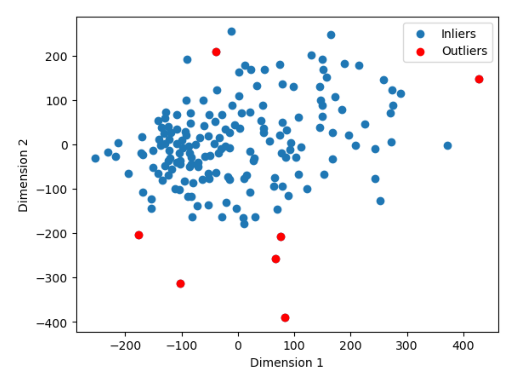

In [16]:
plot = plt.imread(os.path.join(target_folder, 'outliers_visualized.png'))
plt.axis('off')
plt.imshow(plot)

## Training and evaluating
Training a new model can be done by calling the `train_and_evaluate_model` function, specifying the path to the dataset, configuration file, and the target folder. Feature importances can also be calculated with this function.

In [2]:
data_path = 'example_data.csv'
target_folder = 'example_results/train'
config_path = 'config.yaml'
res = train_and_evaluate_model(data_path=data_path,
                         config_path=config_path,
                         target_folder=target_folder,
                         calculate_feature_importances=True)

fold_0: gs_roc: 0.6765058479532164
fold_1: gs_roc: 0.7783918128654971
fold_2: gs_roc: 0.7285380116959065
fold_3: gs_roc: 0.6653801169590643
fold_4: gs_roc: 0.6516374269005848


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|██████████| 143/143 [07:28<00:00,  3.14s/it]


#### Printing the results and the plots
Calling the function returns the corss validated metrics with a 95% confidence interval. It is also saved as a csv in the target folder as `cross_val_result.csv`

In [3]:
res

,mean,+/-
auc,0.695356,0.169145
logloss,0.652274,0.2496
brier_loss,0.20123,0.070987
accuracy,0.699015,0.118074
balanced_accuracy,0.713307,0.11319
f1_score,0.500504,0.12775
average_precision,0.409548,0.193765


The ROC and the PR curve is saved in the target folder as `test_result_roc_curve.png` and `test_result_pr_curve.png` respectively.

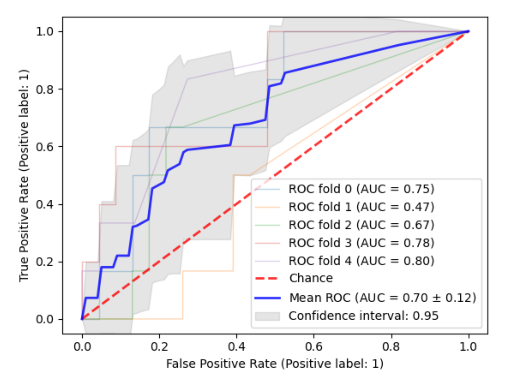

In [5]:
%matplotlib inline 
roc = plt.imread(os.path.join(target_folder, 'test_result_roc_curve.png'))
plt.axis('off')
plt.imshow(roc)

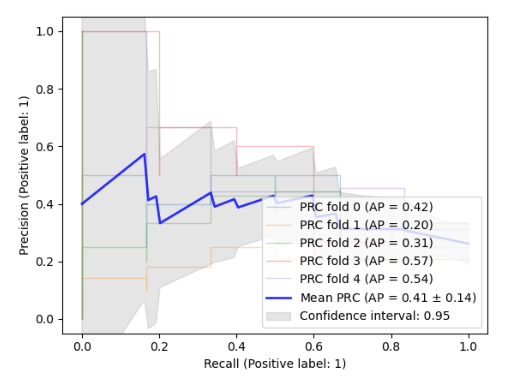

In [6]:
pr = plt.imread(os.path.join(target_folder, 'test_result_pr_curve.png'))
plt.axis('off')
plt.imshow(pr)

#### Feature importances
The importance values (i.e. the absolute mean SHAP values) for each features are saved in the targetfolder as `feature_importances.csv`

In [9]:
pd.read_csv(os.path.join(target_folder, 'feature_importances.csv'), index_col=0)

,col_name,mean_abs_shap_values
0,LVEDV,0.008888
1,LVESV,0.015619
2,LVSV,0.008034
3,LVEF,0.016118
4,LVM,0.008016
5,LVGLS,0.015718
6,LVGCS,0.015171
7,RVEDV,0.006070
8,RVESV,0.006170
9,RVSV,0.006600


In addition a plot is created in the target folder to better visualize these values

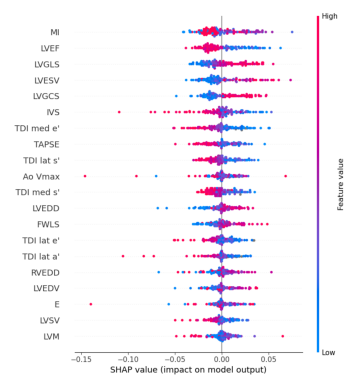

In [10]:
shap_plot = plt.imread(os.path.join(target_folder, 'feature_importances_plot.png'))
plt.axis('off')
plt.imshow(shap_plot)

## Evaluating a trained model on an external dataset
Evaluating a trained model can be done by calling the `evaluate` function, specifying the path to the previously saved model, the dataset, configuration file, and the target folder, as well as the name of the target feature that is to be predicted. Feature importances can also be calculated with this function.

***Note:** for the sake of simplicity, to demonstrate the use of this feature we are running the evaluation on the data that the model was trained on. However, when used in a real setting this feature should only be used on a different data*

In [15]:
%matplotlib notebook
data_path = 'example_data.csv'
model_path = 'example_results/train/model.pickle'
target_folder = 'example_results/eval'
target_column = 'Death'
res_eval = evaluate_model(model_path=model_path,
                          data_path=data_path,
                          target_column=target_column,
                          target_folder=target_folder,
                          calculate_feature_importances=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Printing the results and the plots
Calling the function returns the resulting metrics. In addition, it is also saved as a csv in the target folder as `test_result.csv`

In [16]:
res_eval

,0
auc,0.930558
average_precision,0.775997
logloss,0.282844
brier_loss,0.085679
accuracy,0.890805
balanced_accuracy,0.891201
f1_score,0.776471


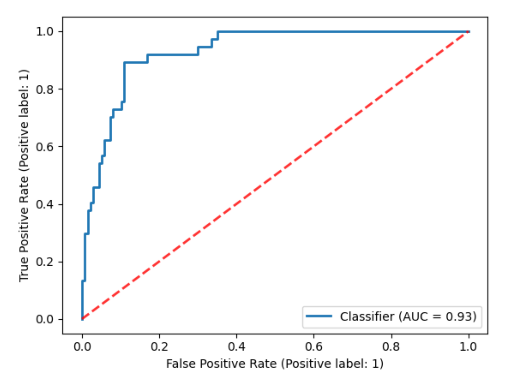

In [17]:
%matplotlib inline 
roc = plt.imread(os.path.join(target_folder, 'test_result_roc_curve.png'))
plt.axis('off')
plt.imshow(roc)

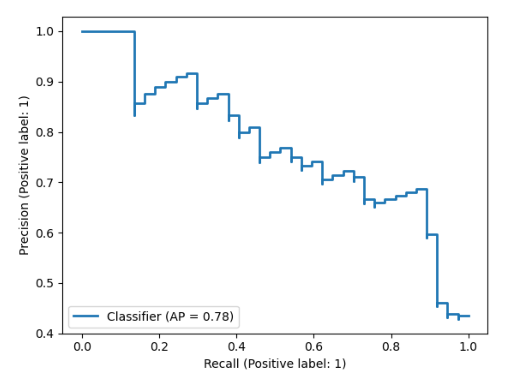

In [18]:
pr = plt.imread(os.path.join(target_folder, 'test_result_pr_curve.png'))
plt.axis('off')
plt.imshow(pr)